# Deep Learning

- **Name:** `Melika Nobakhtian (4021305965008)`

---

- **Name:** `Mohammadali Yousefzadeh (4021305965006)`




# Question 1: Multilayer Perceptron (MLP)

## Section 1.1 (Designing a MLP)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

At first, we **normalize** pixel values and make images **flatten** to make them ready for model training:

In [ ]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Define the MLP model
model = keras.Sequential([
    layers.Dense(100, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7401 - loss: 0.7566 - val_accuracy: 0.8424 - val_loss: 0.4652
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8430 - loss: 0.4724 - val_accuracy: 0.8554 - val_loss: 0.4309
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8528 - loss: 0.4414 - val_accuracy: 0.8611 - val_loss: 0.4230
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8601 - loss: 0.4278 - val_accuracy: 0.8662 - val_loss: 0.4163
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8616 - loss: 0.4173 - val_accuracy: 0.8657 - val_loss: 0.4137
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8648 - loss: 0.4113 - val_accuracy: 0.8621 - val_loss: 0.4182
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8658 - loss: 0.4059 - val_accuracy: 0.8646 - val_loss: 0.4189
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8675 - loss: 0.404

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


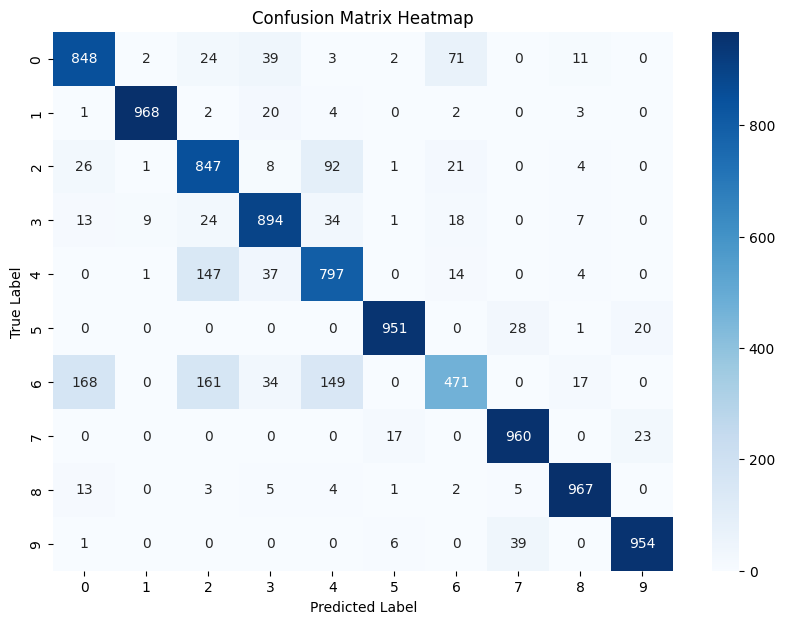

In [ ]:
# Generate Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compute the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using Seaborn Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

Label Description:

0.   T-shirt/top
1.   Trouser
2.   Pullover
3.   Dress
4.   Coat
5.   Sandal
6.   Shirt
7.   Sneaker
8.   Bag
9.   Ankle boot



Among these results, some classes have more samples that have mistaken with another class, which we have mentioned a few cases for example:


*   **Class 2 (Pullover)**: misclassified with **Class 4 (Coat)** 92  times
*   **Class 4 (Coat)**: misclassified with **Class 2 (Pullover)** 147  times
*   **Class 6 (Shirt)**: misclassified with **Class 0 (T-shirt/top)** 168 times
*   **Class 5 (Sandal)**: misclassified with **Class 7 (Sneaker)** 28 times







In [ ]:
# Identify the most misclassified class for each class
print("Most Misclassified Class for Each Class:")
for i in range(len(conf_matrix)):  # Iterate over each actual class
    row = conf_matrix[i].copy()
    row[i] = 0  # Ignore the diagonal (correct classifications)

    if np.sum(row) == 0:  # If no misclassifications for this class
        print(f"Class {i} - No misclassifications")
    else:
        most_confused_with = np.argmax(row)  # Get the class most confused with
        misclassified_count = row[most_confused_with]
        print(f"Class {i} is most often misclassified as Class {most_confused_with} ({misclassified_count} times)")

Most Misclassified Class for Each Class:
Class 0 is most often misclassified as Class 6 (71 times)
Class 1 is most often misclassified as Class 3 (20 times)
Class 2 is most often misclassified as Class 4 (92 times)
Class 3 is most often misclassified as Class 4 (34 times)
Class 4 is most often misclassified as Class 2 (147 times)
Class 5 is most often misclassified as Class 7 (28 times)
Class 6 is most often misclassified as Class 0 (168 times)
Class 7 is most often misclassified as Class 9 (23 times)
Class 8 is most often misclassified as Class 0 (13 times)
Class 9 is most often misclassified as Class 7 (39 times)


In [ ]:
# Function to plot misclassified pairs
def plot_misclassified_pairs(actual_class, predicted_class, num_samples=5):
    indices = np.where((y_test == actual_class) & (y_pred == predicted_class))[0]
    indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)

    if len(indices) == 0:
        print(f"No misclassified images for {actual_class} -> {predicted_class}")
        return

    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")  # Reshape back to 28x28
        plt.axis("off")
        plt.title(f"True: {actual_class}\nPred: {predicted_class}")
    plt.show()

To better find out that why these mistakes happened, it is good to visualize some of these misclassified samples. In the following, you can see misclassified samples for **Class 2 (Pullover)** and **Class 4 (Coat)**. Samples from these two classes are so similar, so we expect this to happen. With more complex network or improving the quality of images, we will achieve better results:

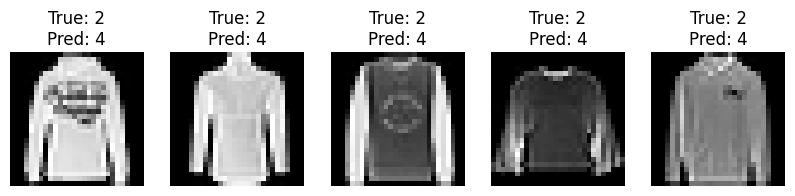

In [ ]:
plot_misclassified_pairs(2,4)

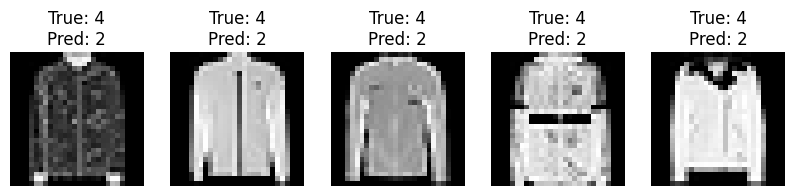

In [ ]:
plot_misclassified_pairs(4,2)

We have similar case for **Class 6 (Shirt)** and **Class 0 (T-shirt/top)** too. The form and shape of clothes in these classes is too similar:

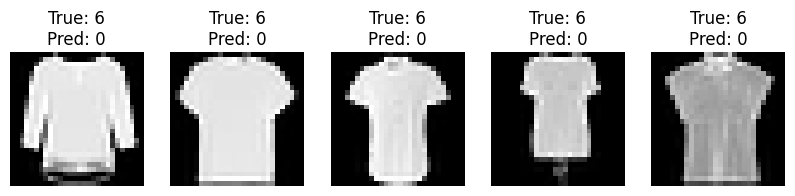

In [ ]:
plot_misclassified_pairs(6,0)

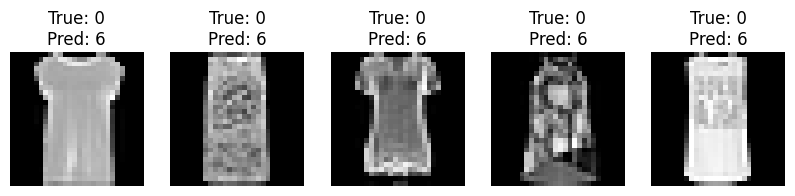

In [ ]:
plot_misclassified_pairs(0,6)

## Section 1.2 (Training Two Different Models)

### Define 2 Models

In [ ]:
# Define Model 1: 128 neurons, no regularization/dropout
model1 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Define Model 2: 48 neurons, dropout (0.2), L2 regularization (0.0001)
model2 = keras.Sequential([
    layers.Dense(48, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

### Compile and Train both models

In [ ]:
# Compile both models using Stochastic Gradient Descent (SGD)
for model in [model1, model2]:
    model.compile(
        optimizer=keras.optimizers.SGD(),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6866 - loss: 0.9938 - val_accuracy: 0.8039 - val_loss: 0.5788
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8190 - loss: 0.5342 - val_accuracy: 0.8237 - val_loss: 0.5149
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8353 - loss: 0.4757 - val_accuracy: 0.8300 - val_loss: 0.4877
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8456 - loss: 0.4510 - val_accuracy: 0.8356 - val_loss: 0.4694
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8524 - loss: 0.4312 - val_accuracy: 0.8437 - val_loss: 0.4469
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8563 - loss: 0.4157 - val_accuracy: 0.8451 - val_loss: 0.4384
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8620 - loss: 0.4009 - val_accuracy: 0.8467 - val_loss: 0.4361
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8672 - loss: 0.3866 

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6162 - loss: 1.1502 - val_accuracy: 0.7828 - val_loss: 0.6407
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7818 - loss: 0.6508 - val_accuracy: 0.8110 - val_loss: 0.5617
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8069 - loss: 0.5782 - val_accuracy: 0.8219 - val_loss: 0.5211
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8244 - loss: 0.5307 - val_accuracy: 0.8308 - val_loss: 0.4961
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8296 - loss: 0.5027 - val_accuracy: 0.8338 - val_loss: 0.4769
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8322 - loss: 0.4854 - val_accuracy: 0.8372 - val_loss: 0.4678
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8378 - loss: 0.4742 - val_accuracy: 0.8400 - val_loss: 0.4524
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8449 - loss: 0.4586 -

### Histograms of Weight Distributions both Models

In [ ]:
# Extract weights from both models
weights1_input = model1.layers[0].get_weights()[0]  # Input layer weights for Model 1
weights1_hidden = model1.layers[1].get_weights()[0]  # Hidden-to-output layer weights for Model 1

weights2_input = model2.layers[0].get_weights()[0]  # Input layer weights for Model 2
weights2_hidden = model2.layers[2].get_weights()[0]  # Hidden-to-output layer weights for Model 2 (skipping Dropout)

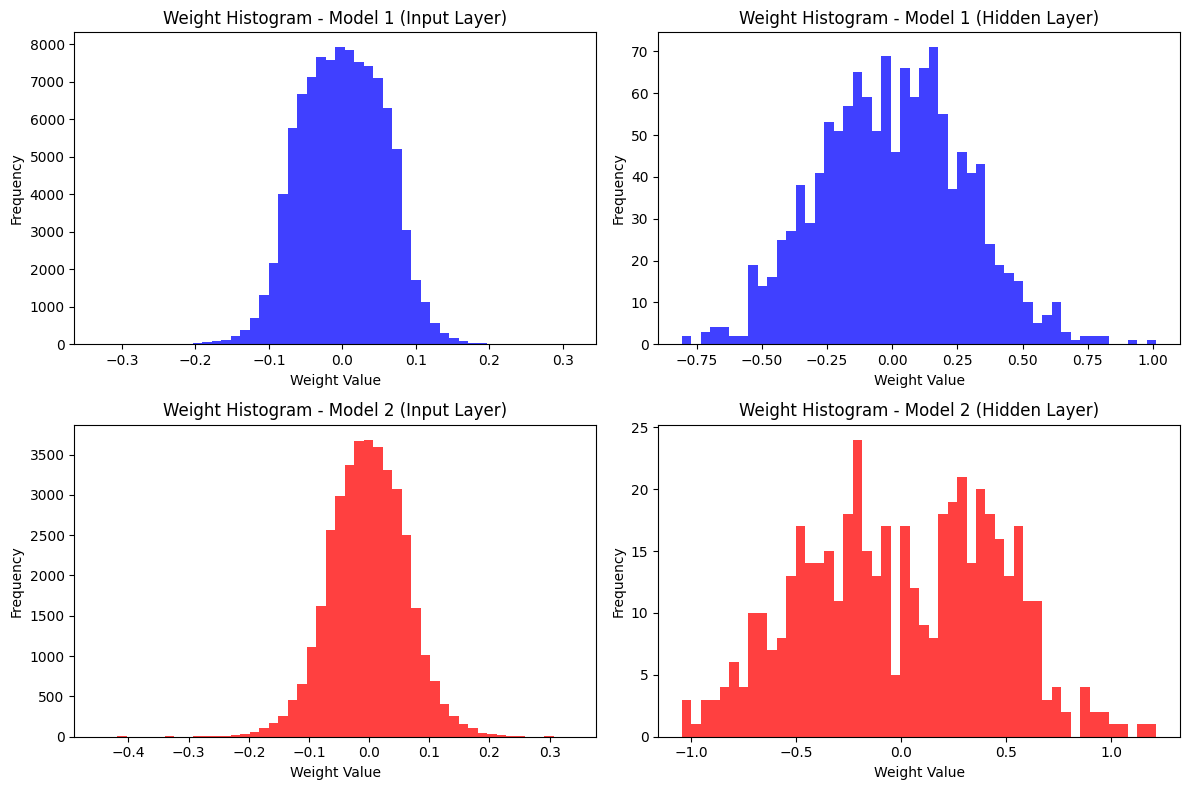

In [ ]:
# Plot Histograms of Weights
plt.figure(figsize=(12, 8))

# Model 1 - Input Layer Weights
plt.subplot(2, 2, 1)
plt.hist(weights1_input.flatten(), bins=50, alpha=0.75, color="blue")
plt.title("Weight Histogram - Model 1 (Input Layer)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

# Model 1 - Hidden Layer Weights
plt.subplot(2, 2, 2)
plt.hist(weights1_hidden.flatten(), bins=50, alpha=0.75, color="blue")
plt.title("Weight Histogram - Model 1 (Hidden Layer)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

# Model 2 - Input Layer Weights
plt.subplot(2, 2, 3)
plt.hist(weights2_input.flatten(), bins=50, alpha=0.75, color="red")
plt.title("Weight Histogram - Model 2 (Input Layer)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

# Model 2 - Hidden Layer Weights
plt.subplot(2, 2, 4)
plt.hist(weights2_hidden.flatten(), bins=50, alpha=0.75, color="red")
plt.title("Weight Histogram - Model 2 (Hidden Layer)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



### **Observations from the Histograms**
#### **Model 1**
1. **Input Layer**
   - The weight distribution is centered around zero with a bell-shaped curve.
   - It resembles a Gaussian distribution, likely due to the default initialization method.
   - The weights are relatively tightly clustered, suggesting that the network learned a stable distribution without excessive weight updates.

2. **Hidden Layer**
   - The histogram remains centered around zero but shows a wider spread compared to the input layer.
   - There are no extreme values, but the shape appears slightly more dispersed, indicating a balanced training process without significant overfitting.

#### **Model 2**
1. **Input Layer (Bottom Left)**
   - The distribution is also centered around zero and resembles a normal distribution.
   - Compared to Model 1, the spread is slightly wider, which may be influenced by the L2 regularization that prevents large weight values.

2. **Hidden Layer**
   - The distribution is more irregular, with some peaks and gaps.
   - This is likely due to the **dropout layer (0.2 dropout rate)**, which forces the network to learn redundant pathways by randomly deactivating neurons during training.
   - There are more extreme weight values, suggesting that dropout may have led to larger weight updates to compensate for deactivated neurons.


### **Key Points**
1. **Effect of Regularization & Dropout (Model 2)**
   - L2 regularization encourages smaller weight magnitudes, which is visible in the **input layer histogram** as a slightly more compact distribution.
   - Dropout in the hidden layer introduces **more irregularity in the weight distribution**, leading to a histogram with more peaks and valleys.

2. **Model 1 vs. Model 2**
   - Model 1 has **smoother, more stable weight distributions** since it has no regularization or dropout.
   - Model 2 shows **a more scattered weight distribution** in the hidden layer due to dropout’s effect on forcing diverse feature learning.


## Section 1.3 (Backpropagation Algorithm)

In [ ]:
# Define a common MLP model architecture
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Optimizers to compare
optimizers = {
    "RMSProp": keras.optimizers.RMSprop(learning_rate=0.001),
    "Adam": keras.optimizers.Adam(learning_rate=0.001),
    "Nadam": keras.optimizers.Nadam(learning_rate=0.001)
}

histories = {}  # To store training history

In [ ]:
# Train models using different optimizers
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...\n")
    model = create_model()
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=32,
        validation_data=(x_test, y_test),
        verbose=1
    )

    histories[name] = history  # Store history for later comparison


Training with RMSProp optimizer...

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7735 - loss: 0.6627 - val_accuracy: 0.8448 - val_loss: 0.4453
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8587 - loss: 0.3974 - val_accuracy: 0.8591 - val_loss: 0.4037
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8721 - loss: 0.3542 - val_accuracy: 0.8526 - val_loss: 0.4291
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8774 - loss: 0.3352 - val_accuracy: 0.8709 - val_loss: 0.3719
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8880 - loss: 0.3153 - val_accuracy: 0.8688 - val_loss: 0.3766
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8909 - loss: 0.3107 - val_accuracy: 0.8695 - val_loss: 0.3862
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8954 - loss: 0.2964 - val_accuracy: 0.8709 - val_loss: 0.4013
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/

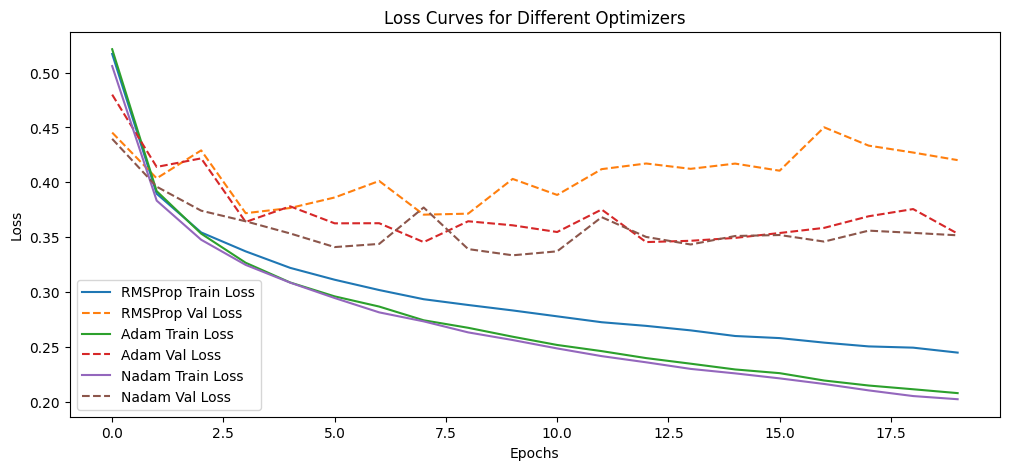

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))

for name, history in histories.items():
    plt.plot(history.history['loss'], label=f"{name} Train Loss")
    plt.plot(history.history['val_loss'], linestyle="dashed", label=f"{name} Val Loss")

plt.title("Loss Curves for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

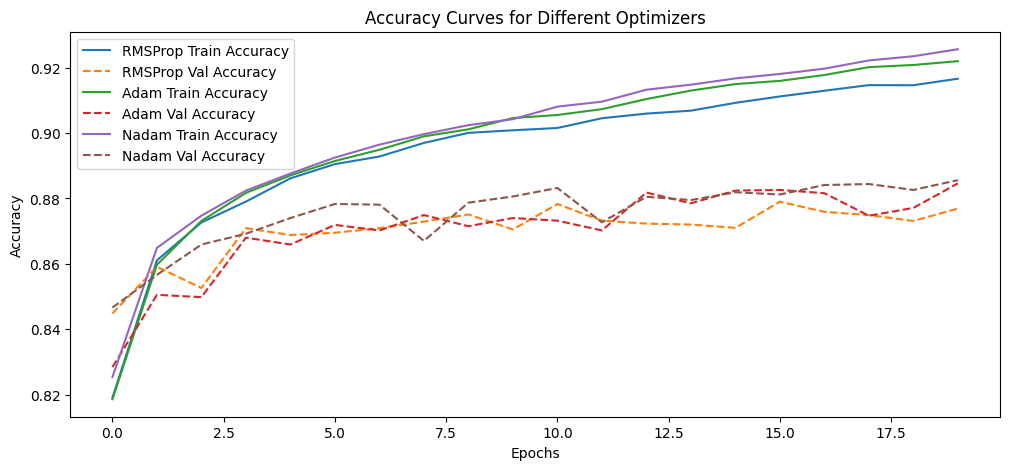

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f"{name} Train Accuracy")
    plt.plot(history.history['val_accuracy'], linestyle="dashed", label=f"{name} Val Accuracy")

plt.title("Accuracy Curves for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Final Evaluation of Each Model
for name, history in histories.items():
    final_val_acc = history.history["val_accuracy"][-1]
    final_train_acc = history.history["accuracy"][-1]
    print(f"{name} Optimizer - Final Train Accuracy: {final_train_acc:.4f}, Final Validation Accuracy: {final_val_acc:.4f}")

RMSProp Optimizer - Final Train Accuracy: 0.9166, Final Validation Accuracy: 0.8769
Adam Optimizer - Final Train Accuracy: 0.9220, Final Validation Accuracy: 0.8846
Nadam Optimizer - Final Train Accuracy: 0.9257, Final Validation Accuracy: 0.8856


### **Analysis of Optimizers**

#### **Loss Curves Analysis**
- The training loss decreases steadily for all three optimizers (RMSprop, Adam, and Nadam).
- Adam and Nadam seem to perform similarly, achieving the lowest loss values over epochs.
- RMSprop, while also decreasing, has a slightly higher loss compared to the other two.
- The validation loss behaves more erratically, particularly for RMSprop, which shows fluctuations, indicating possible instability or overfitting.
- Nadam and Adam have relatively smoother validation loss curves, suggesting better generalization.

#### **Accuracy Curves Analysis**
- Training accuracy for all optimizers increases over time, with Nadam achieving the highest accuracy, followed closely by Adam.
- RMSprop lags slightly behind the other two in training accuracy.
- Validation accuracy remains unstable for all optimizers, with noticeable fluctuations.
- Adam and Nadam maintain slightly higher validation accuracy compared to RMSprop.


- **Best optimizer:** **Nadam** appears to be the best choice as it achieves the highest accuracy while maintaining stable loss behavior.
- **Adam** is a close second, performing almost as well as Nadam.
- **RMSprop** struggles with stability, showing fluctuating validation loss and lower accuracy, making it less ideal.
- **Nadam or Adam** should be preferred over RMSprop because of stability in validation performance


## Section 1.4 (Evaluating Different Hyperparameters)

We considered many parameters for hyperparameter tuning, but because their permutations were too many, we did not examine all parameters in the three cases.

Training model with Nadam, lr=0.001, hidden_size=64, dropout=0.2, layers=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7523 - loss: 0.7233 - val_accuracy: 0.8388 - val_loss: 0.4461
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8490 - loss: 0.4264 - val_accuracy: 0.8526 - val_loss: 0.4017
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8583 - loss: 0.3903 - val_accuracy: 0.8616 - val_loss: 0.3833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8646 - loss: 0.3685 - val_accuracy: 0.8668 - val_loss: 0.3719
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8715 - loss: 0.3537 - val_accuracy: 0.8682 - val_loss: 0.3642
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8734 - loss: 0.3424 - val_accuracy: 0.8705 - val_loss: 0.3674
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8782 - loss: 0.3300 - val_accuracy: 0.8724 - val_loss: 0.3604
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8811 - loss: 0.3216 - 

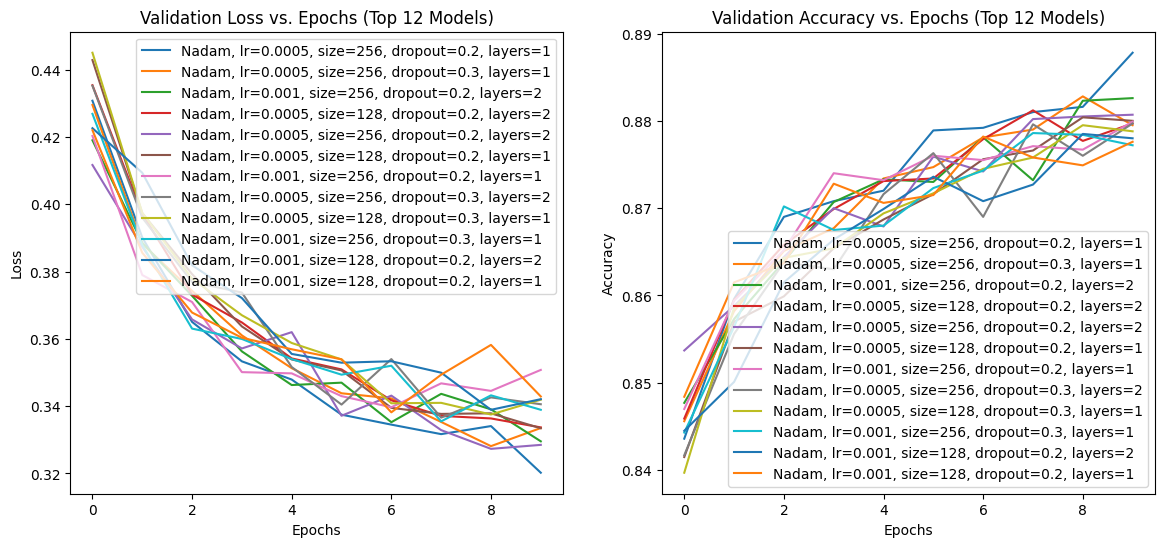


Best Model Found:
Optimizer: Nadam
Learning Rate: 0.0005
Hidden Layer Size: 256
Dropout Rate: 0.2
Number of Hidden Layers: 1
Best Validation Accuracy: 0.8878

Best model saved as 'best_model.h5'. You can load it using tf.keras.models.load_model('best_model.h5').


In [ ]:
import heapq

# Define hyperparameter settings
optimizers = ['Nadam']
learning_rates = [0.001, 0.0005]
hidden_sizes = [64, 128, 256]
dropout_rates = [0.2, 0.3]
num_layers_options = [1, 2]  # One or two hidden layers

batch_size = 32

# Store results
results = {}

for optimizer_name in optimizers:
    for lr in learning_rates:
        for size in hidden_sizes:
            for dropout_rate in dropout_rates:
                for num_layers in num_layers_options:
                    print(f"Training model with {optimizer_name}, lr={lr}, hidden_size={size}, dropout={dropout_rate}, layers={num_layers}")

                    model = Sequential()
                    model.add(Dense(size, activation='relu', input_shape=(784,)))
                    model.add(Dropout(dropout_rate))

                    # Add another hidden layer if num_layers=2
                    if num_layers == 2:
                        model.add(Dense(size // 2, activation='relu'))
                        model.add(Dropout(dropout_rate))

                    model.add(Dense(10, activation='softmax'))

                    # Choose optimizer
                    if optimizer_name == 'Adam':
                        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                    else:
                        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)

                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=batch_size, verbose=1)

                    results[(optimizer_name, lr, size, dropout_rate, num_layers)] = (model, history)

# Select the 12 best models based on highest validation accuracy
top_12_models = heapq.nlargest(12, results.items(), key=lambda x: max(x[1][1].history['val_accuracy']))

# Plot Validation Loss and Validation Accuracy for the Best 12 Models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for key, (model, history) in top_12_models:
    optimizer_name, lr, size, dropout_rate, num_layers = key
    label = f"{optimizer_name}, lr={lr}, size={size}, dropout={dropout_rate}, layers={num_layers}"

    # Plot Validation Loss
    axes[0].plot(history.history['val_loss'], label=label)

    # Plot Validation Accuracy
    axes[1].plot(history.history['val_accuracy'], label=label)

axes[0].set_title('Validation Loss vs. Epochs (Top 12 Models)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='best')

axes[1].set_title('Validation Accuracy vs. Epochs (Top 12 Models)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

plt.show()

# Find the best model (highest validation accuracy)
best_model_info = max(results.items(), key=lambda x: max(x[1][1].history['val_accuracy']))
best_model_key, (best_model, best_history) = best_model_info

# Extract best hyperparameters
optimizer_name, lr, size, dropout_rate, num_layers = best_model_key
best_val_acc = max(best_history.history['val_accuracy'])

# Display Best Model Specifications
print("\nBest Model Found:")
print(f"Optimizer: {optimizer_name}")
print(f"Learning Rate: {lr}")
print(f"Hidden Layer Size: {size}")
print(f"Dropout Rate: {dropout_rate}")
print(f"Number of Hidden Layers: {num_layers}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

# Save the best model for further use
best_model.save("best_model.h5")
print("\nBest model saved as 'best_model.h5'. You can load it using tf.keras.models.load_model('best_model.h5').")


### **Analysis of Validation Loss and Accuracy for the Top 12 Models**

#### **1. Validation Loss Analysis (Left Plot)**
- All models demonstrate a **steady decline in validation loss** over epochs, indicating effective learning.
- **The best model (Nadam, lr=0.0005, size=256, dropout=0.2, layers=1)** follows a consistent downward trend, reaching one of the lowest loss values among the top 12.
- Models with **higher dropout rates (0.3) and more layers (2)** tend to have slightly **higher losses**, suggesting that increased dropout might cause underfitting.
- Loss curves show some fluctuations, particularly in the later epochs, which could indicate **instability** in some models.

#### **2. Validation Accuracy Analysis (Right Plot)**
- Accuracy increases for all models over epochs, reflecting successful learning.
- The best model **achieves the highest validation accuracy of 0.8878**, which is among the top-performing models in the plot.
- Models with **lower learning rates (0.0005) and fewer layers (1)** generally show more stable accuracy improvements, likely due to better generalization.
- Models with **higher dropout (0.3) and more layers (2)** show slightly **slower improvement in accuracy**, potentially due to reduced model capacity.
- Overall, models with **a hidden size of 256 tend to perform better** than those with 128, confirming that a larger feature space is beneficial.

### **Best Model (Nadam, lr=0.0005, size=256, dropout=0.2, layers=1)**
 **Highest Validation Accuracy (0.8878)**: Outperforms other models in validation accuracy.  
 **Stable Validation Loss**: Declines consistently without major fluctuations.  
 **Optimal Learning Rate (0.0005)**: Fast enough for convergence but avoids overshooting.  
 **Dropout Rate (0.2) Balances Regularization**: Prevents overfitting without excessive neuron dropout.  
 **Single Hidden Layer**: Shows better generalization than deeper architectures in this setup.  


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7683 - loss: 0.6792 - val_accuracy: 0.8409 - val_loss: 0.4396
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8556 - loss: 0.4026 - val_accuracy: 0.8589 - val_loss: 0.3904
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8697 - loss: 0.3593 - val_accuracy: 0.8672 - val_loss: 0.3670
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8787 - loss: 0.3341 - val_accuracy: 0.8694 - val_loss: 0.3566
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8843 - loss: 0.3137 - val_accuracy: 0.8783 - val_loss: 0.3392
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8875 - loss: 0.2992 - val_accuracy: 0.8796 - val_loss: 0.3389
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8931 - loss: 0.2867 - val_accuracy: 0.8780 - val_loss: 0.3382
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8971 - loss: 0.2760 

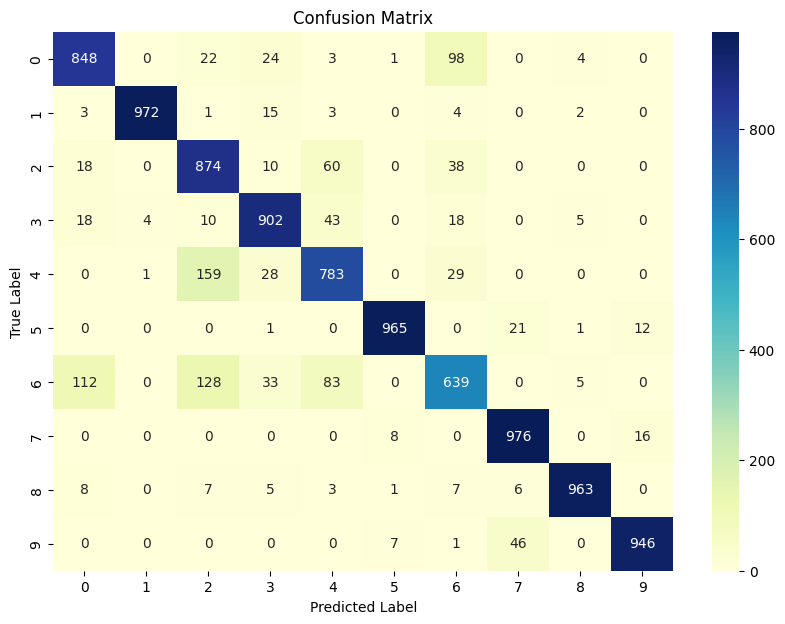

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.87      0.79      1000
           3       0.89      0.90      0.89      1000
           4       0.80      0.78      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.77      0.64      0.70      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Best Model Hyperparameters
best_learning_rate = 0.0005
best_hidden_size = 256
best_dropout_rate = 0.2
batch_size = 32
epochs = 25

# Rebuild the Best Model
best_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(best_hidden_size, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(best_dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile Model with Nadam Optimizer
best_model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=best_learning_rate),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the Best Model
history = best_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

# Get Predictions
y_pred_probs = best_model.predict(x_test)  # Get probability distributions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


The Confusion Matrix also shows that this model is better than the model in the first part and that fewer samples are misclassified.

# Question 2 (Adaline and Madaline)

## Section 2.1 (Adaline)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

The dataset features came in the following. To plot data, we will just use first two features, `alcohol` and `malic_acid`:

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

You can see dataset labels in the follwing cell:


*   **Class 1**: 0
*   **Class 2**: 1
*   **Class 3**: 2



In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Part 1 - Plot Data and Train ADALINE

#### **Observations:**
1. **Class 1 (Blue, Circles)**
   - Mostly found in the **higher alcohol range (13.0 - 14.5)**
   - Malic Acid content is relatively lower (mostly between **1.0 - 3.0**)
   - Class 1 wines seem to be more spread out in the x-axis but concentrated in the lower half of the y-axis.

2. **Class 2 (Red, Squares)**
   - Concentrated in the **lower alcohol range (11.0 - 12.8)**
   - Malic Acid values are mostly between **1.0 - 3.5**, but a few go higher.
  
3. **Class 3 (Green, Triangles)**
   - Found in the **mid-range alcohol values (12.5 - 14.0)**
   - Malic Acid content is more widely spread, reaching values up to **5-6**, making it the class with the highest Malic Acid variation.
   - Some overlap with Class 1 and Class 2, but a distinct group with higher Malic Acid values.

### **Key Takeaways:**
- **Alcohol content is a distinguishing feature**: Class 1 tends to have higher alcohol, Class 2 has lower alcohol, and Class 3 is in between.
- **Class separation is not perfect**: Some overlap occurs, particularly between Class 1 and Class 3 at mid-range alcohol levels.


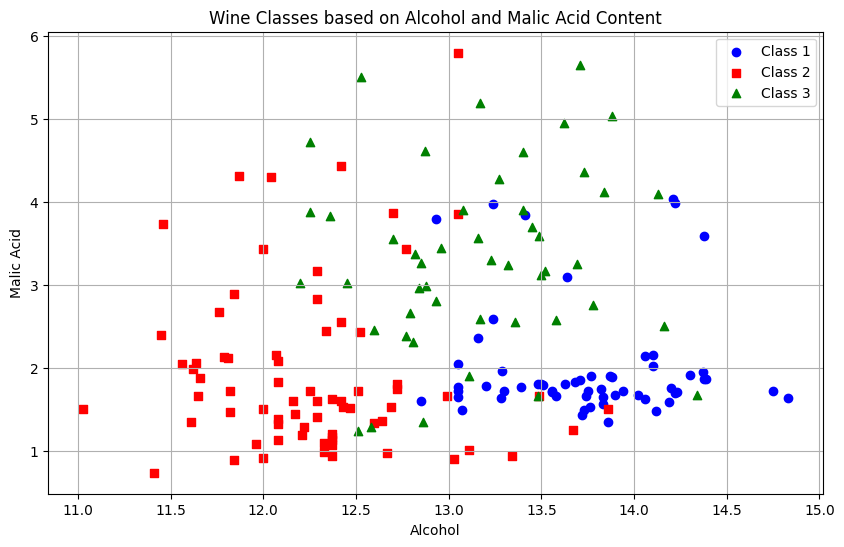

In [ ]:
# Extracting the Alcohol and Malic Acid features
alcohol_idx = wine.feature_names.index('alcohol')
malic_acid_idx = wine.feature_names.index('malic_acid')

X_selected = X[:, [alcohol_idx, malic_acid_idx]]
feature_names = ['Alcohol', 'Malic Acid']

# Part A: Visualize Alcohol and Malic Acid attributes
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']
markers = ['o', 's', '^']
labels = ['Class 1', 'Class 2', 'Class 3']

for i, label in enumerate(np.unique(y)):
    plt.scatter(
        X[y == i, alcohol_idx],
        X[y == i, malic_acid_idx],
        c=colors[i],
        marker=markers[i],
        label=labels[i]
    )

plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Wine Classes based on Alcohol and Malic Acid Content')
plt.legend()
plt.grid(True)
plt.show()

Because we want to predict **Class 1** vs others, we should convert labels to suitable format based on the class and ADALINE outputs. Then we will use scaler on data and obtain train and test data:

In [ ]:
# Binary classification: class 1 vs others
y_binary = np.where(y == 0, 1, -1)  # Convert to {-1, 1}

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_binary, test_size=0.2, random_state=42)



#### **Adaptive Linear Neuron (ADALINE)**
ADALINE is a **one-layer perceptron** that uses a **linear activation function** instead of a step function during training. Unlike the standard perceptron, which updates weights based on misclassified examples, ADALINE minimizes the **Mean Squared Error (MSE)** and employs the **Least Mean Squares (LMS) learning rule** (also known as the **Widrow-Hoff rule**) to update weights.

 **1. Activation Function**

During training, the activation function in ADALINE is a **linear function**:

$
y_{\text{in}} = b + \sum_{i=1}^{n} x_i w_i
$

However, after training, a **step function (sign function)** is applied to determine the final output:

$
y =
\begin{cases}
1, & \text{if } y_{\text{in}} \geq 0 \\
-1, & \text{if } y_{\text{in}} < 0
\end{cases}
$

Unlike the perceptron, ADALINE does not apply this function during weight updates—only at inference time.

---

**2. Error Function and Cost Function**

ADALINE minimizes the squared error between the predicted net input $ y_{\text{in}} $ and the target $ t $:

$
E = \frac{1}{2} \sum_{i=1}^{m} (t_i - y_{\text{in},i})^2
$

This cost function is differentiable, allowing the use of **gradient descent** for optimization.

---

**3. Learning Rule (Widrow-Hoff Rule)**

The weight update rule follows the **Least Mean Squares (LMS) algorithm**, which is derived from **gradient descent**:

$
\Delta w_i = \alpha (t - y_{\text{in}}) x_i
$

$
w_i^{\text{new}} = w_i^{\text{old}} + \alpha (t - y_{\text{in}}) x_i
$

$
b^{\text{new}} = b^{\text{old}} + \alpha (t - y_{\text{in}})
$

Where:
- $ \alpha $ is the **learning rate** (small value, e.g., 0.1).
- $ t $ is the target output.
- $ y_{\text{in}} $ is the weighted sum of inputs.
- $ x_i $ are the input features.

---

**4. ADALINE Training Algorithm**

The training process follows these steps:

1. **Initialize** weights $ w_i $ and bias $ b $ with small random values.
2. **Set learning rate $ \alpha $**
3. Repeat until **weight changes are below a threshold**:
   - For each **training sample**:
     1. Compute the **net input**:
     
        $
        y_{\text{in}} = b + \sum_{i=1}^{n} x_i w_i
        $
     2. **Update weights** using LMS:

        $
        w_i^{\text{new}} = w_i^{\text{old}} + \alpha (t - y_{\text{in}}) x_i
        $

        $
        b^{\text{new}} = b^{\text{old}} + \alpha (t - y_{\text{in}})
        $



In [ ]:
def Adaline(X, y, lr=0.01, stop=0.001, max_epochs=1000):
    weights = np.random.randn(X.shape[1])
    bias = np.random.randn()
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(X.shape[0]):
            net_input = np.dot(X[i], weights) + bias  # Forward pass
            error = y[i] - net_input  # Compute error
            weights += lr * error * X[i]  # Update weights
            bias += lr * error  # Update bias
            total_error += 0.5 * (error ** 2)  # Compute MSE (1/2 * (target - net_input)^2)
        errors.append(total_error)

        if total_error < stop:
            break  # Stop if error is below threshold

    return weights, bias, errors

In [ ]:
# Train Adaline
weights, bias, errors = Adaline(X_train, y_train, lr=0.01, stop=0.001)

Error at first epochs has large values but it decreases very fast and in epoch 9, it approximately gets value 9 and in the follwoing epochs, it didn't change so much:

In [ ]:
errors[:15]

[362.00251107660483,
 79.20802872925188,
 34.644851237779186,
 19.703916405394068,
 13.881045584237025,
 11.506351964937085,
 10.510836614810998,
 10.078929677918438,
 9.881465483937445,
 9.784049065385789,
 9.73113830090023,
 9.699327318344341,
 9.678420142120356,
 9.663733023973794,
 9.65294434139282]

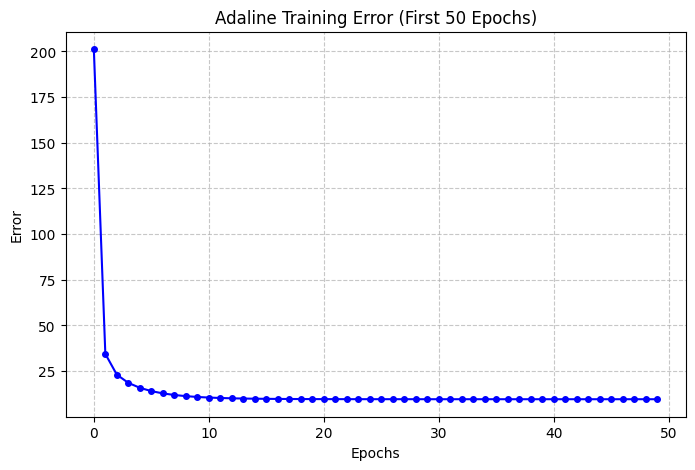

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(errors[:50], marker='o', linestyle='-', color='b', markersize=4)  # Only plot first 50 epochs
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Adaline Training Error (First 50 Epochs)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
def predict(X, weights, bias):
    net_input = np.dot(X, weights) + bias
    return np.where(net_input >= 0, 1, -1)  # Apply thresholding

y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)
accuracy_train = np.mean(y_pred_train == y_train) * 100
accuracy_test = np.mean(y_pred_test == y_test) * 100
print(f"Adaline Classification Accuracy on Train Data: {accuracy_train:.2f}%")
print(f"Adaline Classification Accuracy on Test Data: {accuracy_test:.2f}%")

Adaline Classification Accuracy on Train Data: 98.59%
Adaline Classification Accuracy on Test Data: 100.00%


### Part 2

Now we want to predict **Class 2** vs other classes:

In [ ]:
# Create binary classification - Class 2 vs Non-Class 2
y_binary = np.where(y == 1, 1, -1)  # Convert to {-1, 1}

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_binary, test_size=0.2, random_state=42)

In [ ]:
# Train Adaline
weights, bias, errors = Adaline(X_train, y_train, lr=0.01, stop=0.001)

In [ ]:
errors[:15]

[144.74913045642685,
 37.871384845788306,
 23.11574578996051,
 19.05007708050706,
 17.565356091065453,
 16.923123961681576,
 16.61146396737941,
 16.446591996911696,
 16.353105367693896,
 16.29694365830914,
 16.26153748200977,
 16.238314014228294,
 16.22258884068412,
 16.21167091553619,
 16.203941630129968]

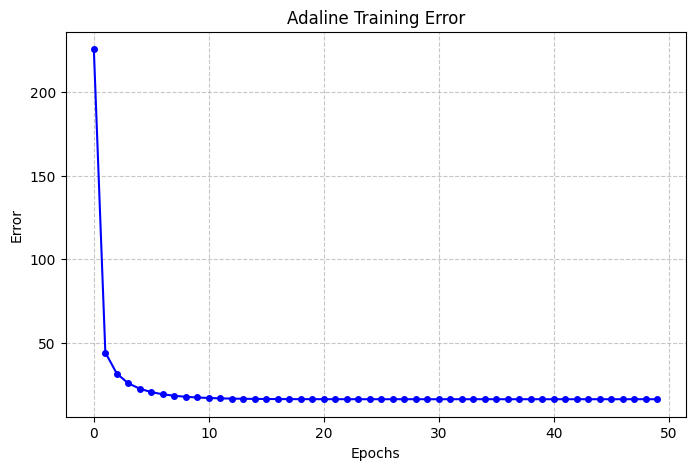

In [ ]:
# Plot error change over epochs with better visualization
plt.figure(figsize=(8, 5))
plt.plot(errors[:50], marker='o', linestyle='-', color='b', markersize=4)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Adaline Training Error')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)
accuracy_train = np.mean(y_pred_train == y_train) * 100
accuracy_test = np.mean(y_pred_test == y_test) * 100
print(f"Adaline Classification Accuracy on Train Data: {accuracy_train:.2f}%")
print(f"Adaline Classification Accuracy on Test Data: {accuracy_test:.2f}%")

Adaline Classification Accuracy on Train Data: 99.30%
Adaline Classification Accuracy on Test Data: 100.00%


## Section 2.2 (Madaline)

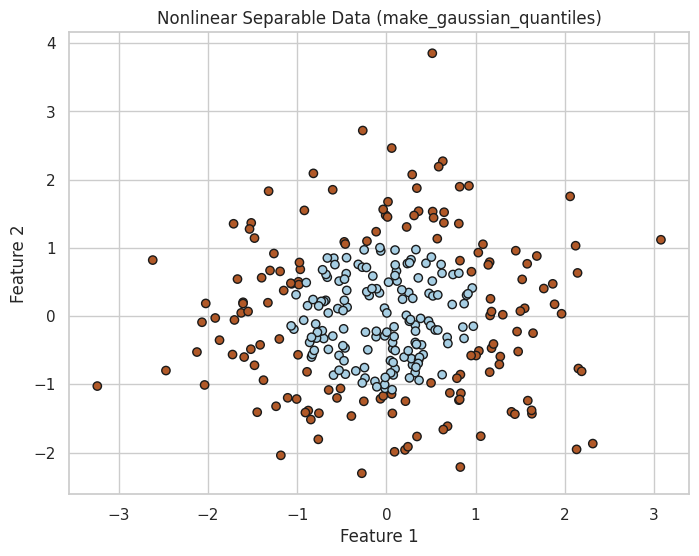

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
import seaborn as sns

np.random.seed(42)

X, y = make_gaussian_quantiles(n_samples=300, n_features=2, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.title('Nonlinear Separable Data (make_gaussian_quantiles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
y_train

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
y_train = 2 * y_train - 1  # Convert labels to {-1, 1}
y_test = 2 * y_test - 1

In [ ]:
class MadalineMR1:
    def __init__(self, input_size, hidden_neurons, lr=0.01, max_epochs=100):
        self.hidden_neurons = hidden_neurons
        self.lr = lr
        self.max_epochs = max_epochs

        # Initialize weights
        self.W_hidden = np.random.randn(input_size, hidden_neurons)
        self.b_hidden = np.zeros(hidden_neurons)
        self.W_output = np.ones(hidden_neurons) / hidden_neurons  # Fixed output weights
        self.b_output = 0  # Fixed output bias

    def activation(self, x):
        return np.where(x >= 0, 1, -1)

    def forward(self, X):
        z_in = np.dot(X, self.W_hidden) + self.b_hidden
        z = self.activation(z_in)
        y_in = np.dot(z, self.W_output) + self.b_output
        y = self.activation(y_in)
        return z_in, z, y

    def train(self, X, y):
        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                z_in, z, y_pred = self.forward(xi)

                if y_pred != target:  # Error occurred
                    if target == 1:
                        j = np.argmin(np.abs(z_in))  # Find hidden unit closest to activation threshold
                        self.b_hidden[j] += self.lr * (1 - z_in[j])
                        self.W_hidden[:, j] += self.lr * (1 - z_in[j]) * xi
                    else:  # target == -1
                        for j in range(self.hidden_neurons):
                            if z_in[j] > 0:  # Only update positive net inputs
                                self.b_hidden[j] += self.lr * (-1 - z_in[j])
                                self.W_hidden[:, j] += self.lr * (-1 - z_in[j]) * xi
                    errors += 1
            if errors == 0:
                break  # Stop if no updates were made

    def predict(self, X):
        _, _, y_pred = self.forward(X)
        return y_pred

In [ ]:
## MADALINE with 3 neurons
model = MadalineMR1(input_size=2, hidden_neurons=3, lr=0.01, max_epochs=100)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"MADALINE with 3 hidden neurons - Accuracy: {accuracy:.2f}%")

MADALINE with 3 hidden neurons - Accuracy: 60.00%


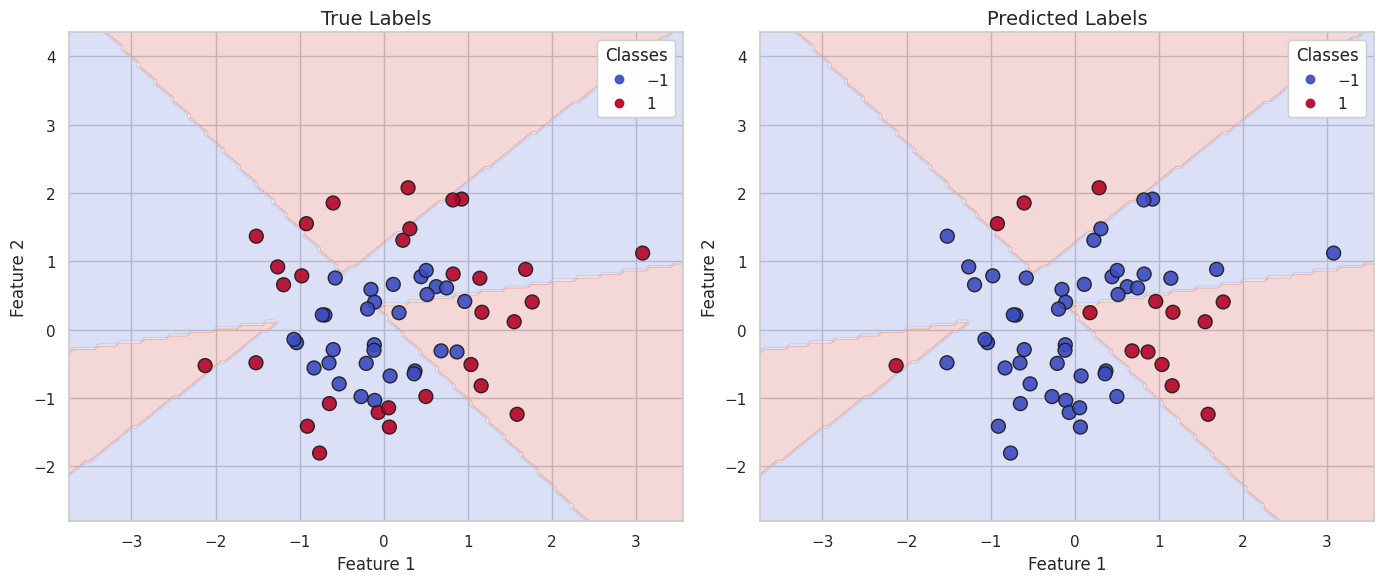

In [ ]:
# Set style
sns.set(style="whitegrid")

# Create a mesh grid for decision boundary
h = 0.05  # Step size
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict across the grid
Z = np.array([model.predict(np.array([a, b])) for a, b in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# True Labels Plot
axes[0].contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
scatter = axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", s=100, edgecolors="k", alpha=0.9)
axes[0].set_title("True Labels", fontsize=14)
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
legend1 = axes[0].legend(*scatter.legend_elements(), title="Classes")
axes[0].add_artist(legend1)

# Predicted Labels Plot
axes[1].contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
scatter = axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm", s=100, edgecolors="k", alpha=0.9)
axes[1].set_title("Predicted Labels", fontsize=14)
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
legend2 = axes[1].legend(*scatter.legend_elements(), title="Classes")
axes[1].add_artist(legend2)

plt.tight_layout()
plt.show()

In [ ]:
## MADALINE with 5 neurons
model = MadalineMR1(input_size=2, hidden_neurons=5, lr=0.01, max_epochs=100)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"MADALINE with 5 hidden neurons - Accuracy: {accuracy:.2f}%")

MADALINE with 5 hidden neurons - Accuracy: 90.00%


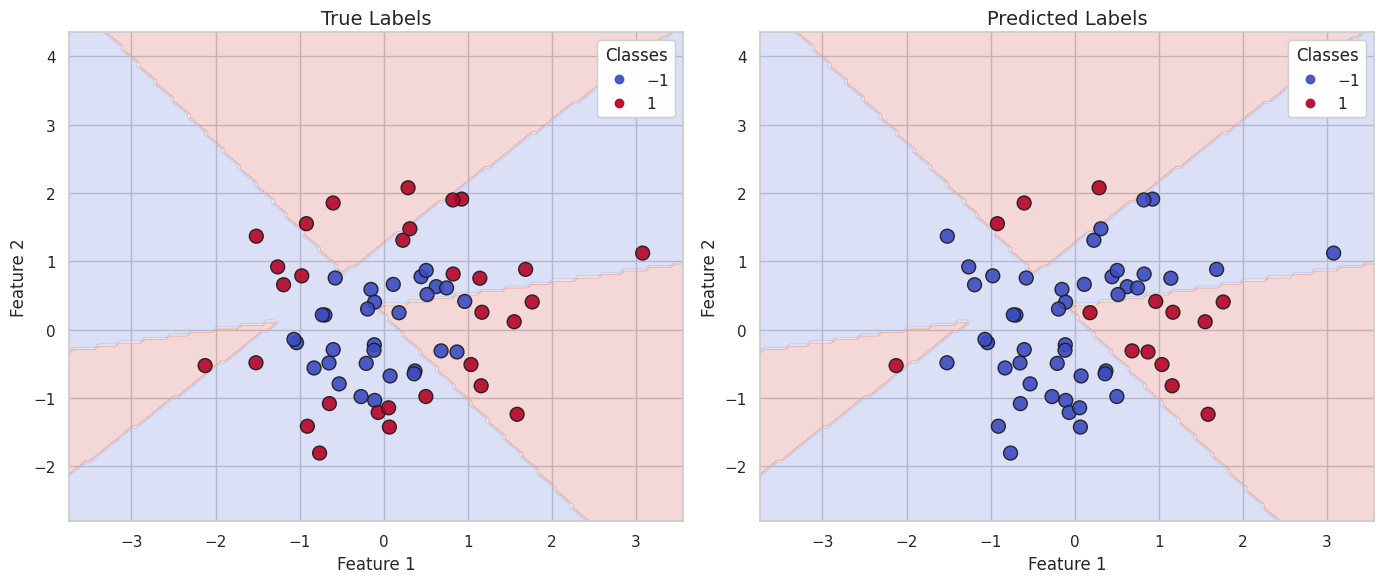

In [ ]:
# Predict across the grid
Z = np.array([model.predict(np.array([a, b])) for a, b in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# True Labels Plot
axes[0].contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
scatter = axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", s=100, edgecolors="k", alpha=0.9)
axes[0].set_title("True Labels", fontsize=14)
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
legend1 = axes[0].legend(*scatter.legend_elements(), title="Classes")
axes[0].add_artist(legend1)

# Predicted Labels Plot
axes[1].contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
scatter = axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm", s=100, edgecolors="k", alpha=0.9)
axes[1].set_title("Predicted Labels", fontsize=14)
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
legend2 = axes[1].legend(*scatter.legend_elements(), title="Classes")
axes[1].add_artist(legend2)

plt.tight_layout()
plt.show()

In [ ]:
## MADALINE with 8 neurons
model = MadalineMR1(input_size=2, hidden_neurons=8, lr=0.01, max_epochs=100)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"MADALINE with 8 hidden neurons - Accuracy: {accuracy:.2f}%")

MADALINE with 8 hidden neurons - Accuracy: 91.67%


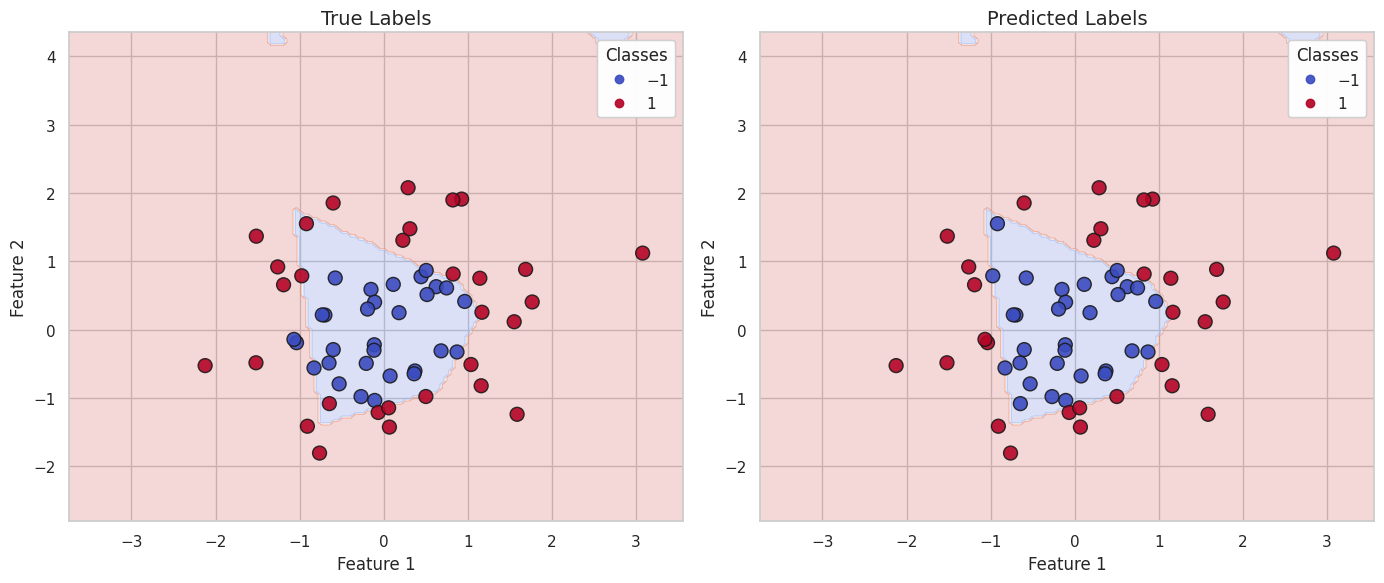

In [ ]:
# Predict across the grid
Z = np.array([model.predict(np.array([a, b])) for a, b in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# True Labels Plot
axes[0].contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
scatter = axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", s=100, edgecolors="k", alpha=0.9)
axes[0].set_title("True Labels", fontsize=14)
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
legend1 = axes[0].legend(*scatter.legend_elements(), title="Classes")
axes[0].add_artist(legend1)

# Predicted Labels Plot
axes[1].contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
scatter = axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm", s=100, edgecolors="k", alpha=0.9)
axes[1].set_title("Predicted Labels", fontsize=14)
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
legend2 = axes[1].legend(*scatter.legend_elements(), title="Classes")
axes[1].add_artist(legend2)

plt.tight_layout()
plt.show()

# Question 3 (House Price Prediction with MLP)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random
from datetime import datetime

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

## Section 1 : Reading the data and displaying NaN values

Based on `df.info()` it seems that we have no null values in any column but in advance, we will show null values in each column too:

In [ ]:
# 3.1
df = pd.read_csv('Question3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

It is obvious that we don't have any null value in each column:

In [ ]:
# 3.1
print("Number of NaN values in each column:")
print(df.isna().sum())
print("\nDataset shape:", df.shape)

Number of NaN values in each column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Dataset shape: (21613, 21)


In [ ]:
# 3.1
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Section 2 - Creating correlation matrix and Finding features with highest correlation to price

From the Correlation Matrix we can see that `sqft_living` is the feature with the highest correlation to `price`. But in the next step, we will sort features based on their correlation with `price`:

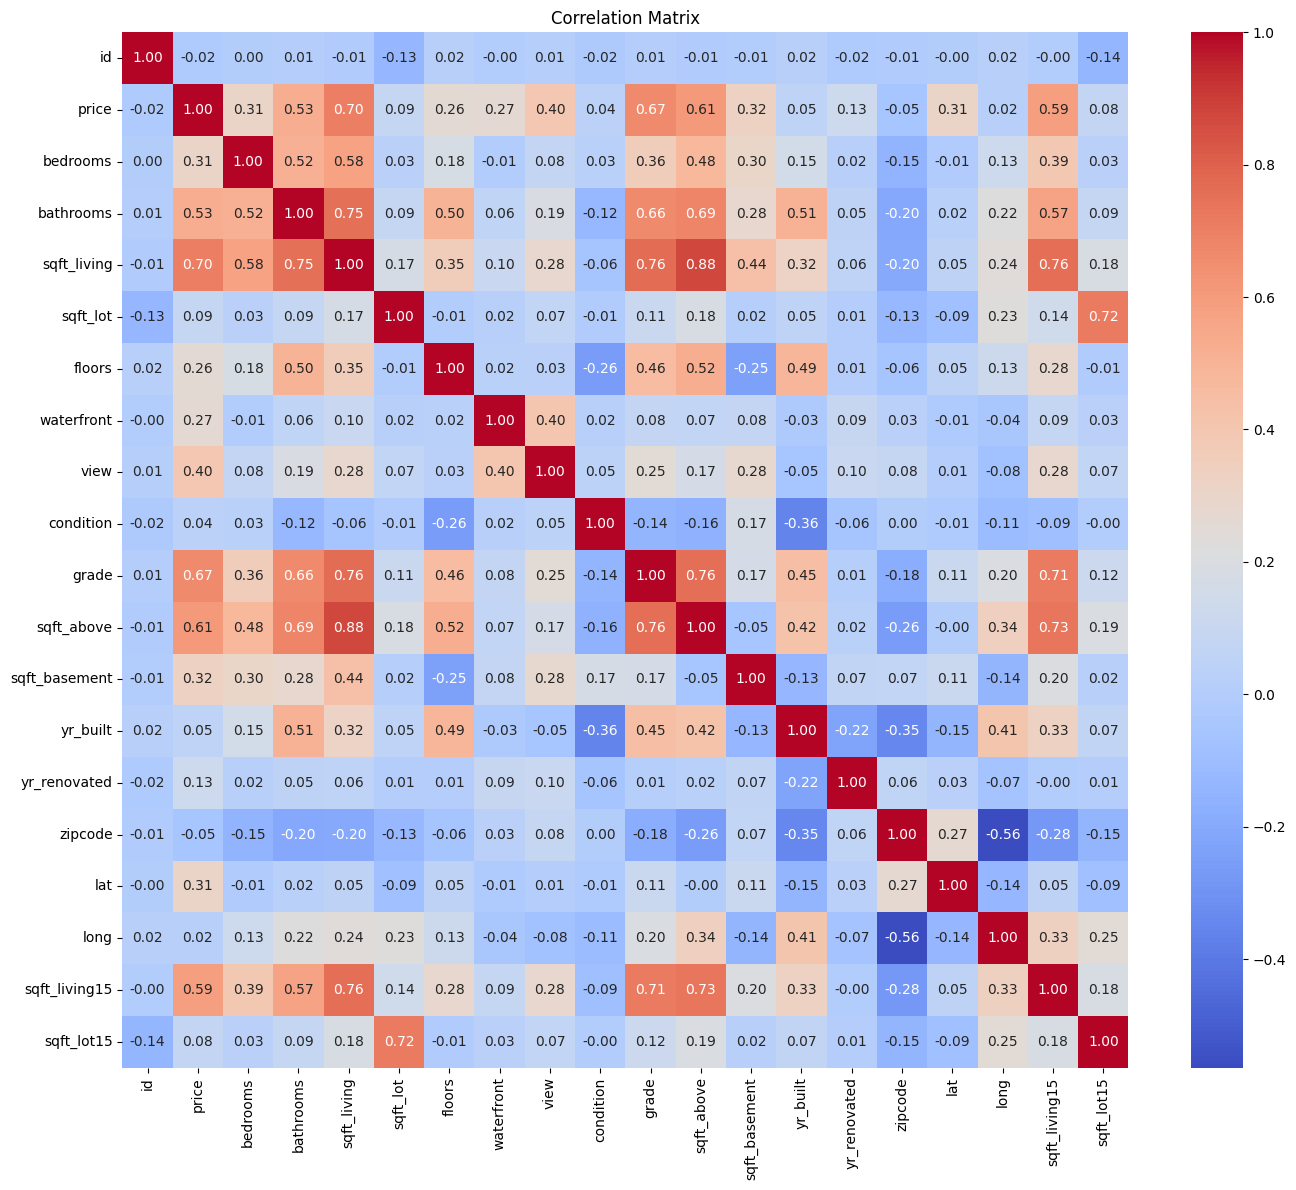

In [ ]:
# 3.2
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

The following features are the ones with correlation higher than 0.5 to `price`:


*   `sqft_living`
*   `grade`
*   `sqft_above`
*   `sqft_living15`
*   `bathrooms`



In [ ]:
# 3.2
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("\nFeatures with highest correlation to price:")
print(price_correlation)
highest_corr_feature = price_correlation.index[1]  # Index 0 will be price itself
print(f"\nFeature with highest correlation to price: {highest_corr_feature}")


Features with highest correlation to price:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

Feature with highest correlation to price: sqft_living


## Section 3 - Plotting distribution of prices and relationship between price and highest correlation feature

This distribution plot of house prices shows a **right-skewed distribution**, meaning that most house prices are concentrated on the lower end of the scale, with a long tail extending towards higher prices.

### **Analysis:**
1. **Most houses are relatively affordable** – The highest frequency is observed at lower price values, indicating that a majority of houses fall within a lower price range.
2. **A few very expensive houses exist** – The long tail on the right suggests that some houses are significantly more expensive than the majority.
3. **Non-Normal Distribution** – This distribution is not normal; it might require **log transformation** or other statistical techniques if used in regression models.

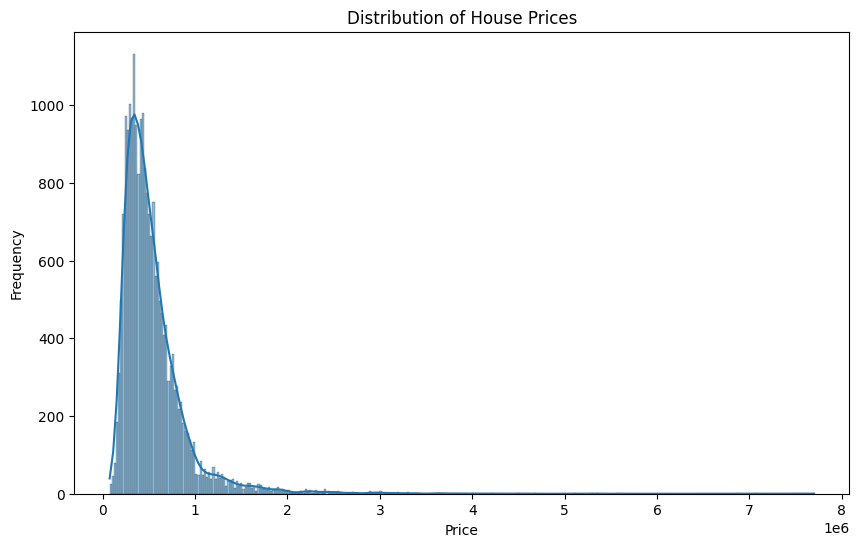

In [ ]:
# 3.3 Plotting distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

 #### **Positive Correlation**  
- The scatter plot shows a **clear positive relationship** between **sqft_living** (square footage of living space) and **price**.  
- As the **size of the house increases**, the **price also tends to increase**.  
- This makes sense because **larger houses generally cost more**.  

#### **Non-Linear Trend**  
- The relationship is **not perfectly linear**; rather, it seems to **curve upward**, meaning that **larger houses increase in price at a faster rate**.  
- This suggests a **non-linear** relationship, possibly exponential or polynomial.  

#### **Spread of Data & Outliers**  
- The spread of house prices **increases** as sqft_living increases.  
  - Small houses (below 2000 sqft) have prices clustered in a **narrow range**.  
  - Large houses (above 6000 sqft) have a **much wider range of prices**, indicating that other factors (e.g., location, luxury features) significantly impact high-end house prices.  
- Some **extreme outliers** exist (e.g., a house around **13,000 sqft** with a significantly lower price than expected). These could be unusual cases or data entry errors.  

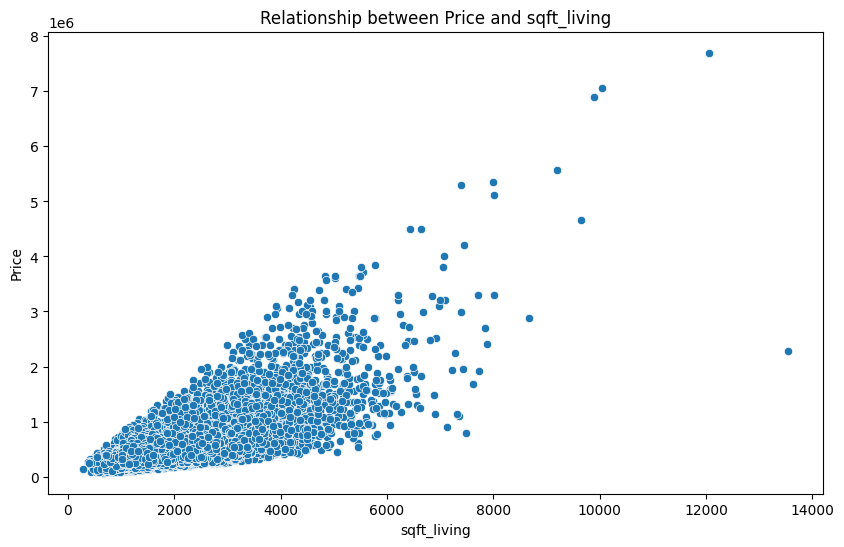

In [ ]:
# Plotting relationship between price and highest correlation feature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[highest_corr_feature], y=df['price'])
plt.title(f'Relationship between Price and {highest_corr_feature}')
plt.xlabel(highest_corr_feature)
plt.ylabel('Price')
plt.savefig('price_correlation.png')
plt.show()

## Section 4 - Data Preprocessing

To convert `date` to `year` and `month`, we should look at the format the format of this column: it seems that the first 4 digits of the `date` string indicate `year` and the follwing 2 digits show `month`. Based on this, we will convert this column to our desired format:

In [ ]:
# 3.4
df['date']

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000
...,...
21608,20140521T000000
21609,20150223T000000
21610,20140623T000000
21611,20150116T000000


In [ ]:
# Extract year and month from the string
df['year'] = df['date'].str[:4].astype(int)
df['month'] = df['date'].str[4:6].astype(int)

# Delete original Date column
df = df.drop('date', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# Split data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Split into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (16209, 21)
Validation set shape: (5404, 21)


In [ ]:
# Scale the data using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale X_train and transform X_val with the same scaler
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

# Reshape y for scaling
y_train_reshaped = y_train.values.reshape(-1, 1)
y_val_reshaped = y_val.values.reshape(-1, 1)

# Scale y_train and transform y_val with the same scaler
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_val_scaled = scaler_y.transform(y_val_reshaped)

## Section 5 - Model Implementation

In [ ]:
# 5. Model Implementation

# Define model with one hidden layer
def create_single_layer_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(1)
    ])
    return model

# Define model with two hidden layers
def create_double_layer_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    return model

## Section 6 - Model Training

In [ ]:
# Initialize models
input_dim = X_train_scaled.shape[1]
single_layer_model = create_single_layer_model(input_dim)
double_layer_model = create_double_layer_model(input_dim)

# Compile models with appropriate loss function and optimizer
single_layer_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
double_layer_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train single layer model
single_layer_history = single_layer_model.fit(
    X_train_scaled, y_train_scaled,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 2/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0013 - val_loss: 8.6289e-04
Epoch 3/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.9460e-04 - val_loss: 7.3755e-04
Epoch 4/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1089e-04 - val_loss: 6.7910e-04
Epoch 5/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8649e-04 - val_loss: 6.4007e-04
Epoch 6/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9918e-04 - val_loss: 5.9450e-04
Epoch 7/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9234e-04 - val_loss: 5.6651e-04
Epoch 8/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5331e-04 - val_loss: 5.4018e-04
Epoch 9/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4164e-04 - val_loss: 5.2579e-04
Epoch 10/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4385e-04 - val_loss: 5.1516e-04
Epoch 11/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.7981e-04

In [ ]:
# Train double layer model
double_layer_history = double_layer_model.fit(
    X_train_scaled, y_train_scaled,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0063 - val_loss: 0.0011
Epoch 2/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0012 - val_loss: 9.1828e-04
Epoch 3/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.5653e-04 - val_loss: 7.2982e-04
Epoch 4/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.4899e-04 - val_loss: 6.5864e-04
Epoch 5/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6925e-04 - val_loss: 5.9522e-04
Epoch 6/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0276e-04 - val_loss: 5.8352e-04
Epoch 7/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5848e-04 - val_loss: 5.3814e-04
Epoch 8/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.9675e-04 - val_loss: 5.7258e-04
Epoch 9/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.2760e-04 - val_loss: 4.9030e-04
Epoch 10/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3955e-04 - val_loss: 5.2104e-04
Epoch 11/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2320e-04

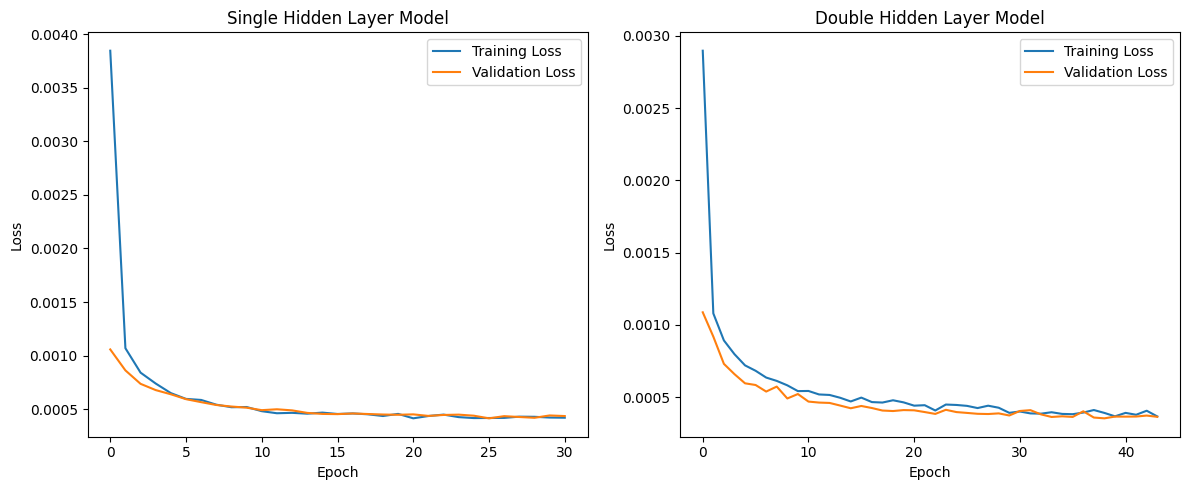

In [ ]:
# Plot training and validation loss for both models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(single_layer_history.history['loss'], label='Training Loss')
plt.plot(single_layer_history.history['val_loss'], label='Validation Loss')
plt.title('Single Hidden Layer Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(double_layer_history.history['loss'], label='Training Loss')
plt.plot(double_layer_history.history['val_loss'], label='Validation Loss')
plt.title('Double Hidden Layer Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Section 7 - Result Analysis

Best epcoh for each model is when the validation loss is in lowest point. So we consider it the optimal epoch for the model:

In [ ]:
# 3.7
# Determine optimal epochs for each model
single_layer_optimal_epoch = np.argmin(single_layer_history.history['val_loss']) + 1
double_layer_optimal_epoch = np.argmin(double_layer_history.history['val_loss']) + 1

### **Model Comparison & Analysis**  

#### **Single Hidden Layer Model:**  
- **Optimal epoch:** 26  
- **Observation:** This model converges faster, meaning it reaches its best validation performance in fewer epochs.  

#### **Double Hidden Layer Model:**  
- **Optimal epoch:** 39  
- **Observation:** This model takes longer to reach its lowest validation loss, which suggests it requires more training to fully capture the data’s patterns.  

#### **Analysis:**  
The single-layer model converges in **fewer epochs (26)** because it has a **simpler architecture** with fewer parameters, allowing it to learn quickly. However, a simpler model might also be limited in capturing complex relationships in the data.  

On the other hand, the double-layer model has **more capacity to learn complex patterns**, but this comes at the cost of requiring **more epochs (39)** to fully converge. The additional layer introduces **more parameters**, which means the model takes longer to optimize.

In [ ]:
print("\n----- Model Comparison -----")
print(f"Single Hidden Layer Model:")
print(f"  - Optimal epoch: {single_layer_optimal_epoch}")
print(f"  - Final training loss: {single_layer_final_train_loss:.6f}")
print(f"  - Final validation loss: {single_layer_final_val_loss:.6f}")

print(f"\nDouble Hidden Layer Model:")
print(f"  - Optimal epoch: {double_layer_optimal_epoch}")
print(f"  - Final training loss: {double_layer_final_train_loss:.6f}")
print(f"  - Final validation loss: {double_layer_final_val_loss:.6f}")


----- Model Comparison -----
Single Hidden Layer Model:
  - Optimal epoch: 26
  - Final training loss: 0.000421
  - Final validation loss: 0.000437

Double Hidden Layer Model:
  - Optimal epoch: 39
  - Final training loss: 0.000366
  - Final validation loss: 0.000363


  
 The **double-layer model achieves lower training and validation loss**, suggesting that it captures the underlying data patterns more effectively.  The difference in loss values is small, but the double-layer model shows a noticeable improvement, particularly in validation loss (**0.000363 vs. 0.000437**).  


✅ **The double-layer model is the better choice** because it achieves lower validation loss and generalizes well.  


In [ ]:
# Select 5 random samples from the validation set
random_indices = random.sample(range(len(X_val_scaled)), 5)
random_samples = X_val_scaled[random_indices]
random_samples_original = X_val.iloc[random_indices]

# Predict prices for selected samples
predicted_prices_scaled = double_layer_model.predict(random_samples, verbose=0)
predicted_prices = scaler_y.inverse_transform(predicted_prices_scaled).flatten()
actual_prices = y_val.iloc[random_indices].values

# Display results
print("\n----- Model Predictions on 5 Random Samples -----")
for i in range(5):
    actual_price = actual_prices[i]
    predicted_price = predicted_prices[i]
    difference = abs(actual_price - predicted_price)
    percentage_error = (difference / actual_price) * 100 if actual_price != 0 else 0

    print(f"\nSample {i+1} (Index: {random_indices[i]})")
    print(f"Actual price: ${actual_price:.2f}")
    print(f"Predicted price: ${predicted_price:.2f}")
    print(f"Difference: ${difference:.2f}")
    print(f"Percentage error: {percentage_error:.2f}%")


----- Model Predictions on 5 Random Samples -----

Sample 1 (Index: 260)
Actual price: $3650000.00
Predicted price: $3437833.50
Difference: $212166.50
Percentage error: 5.81%

Sample 2 (Index: 244)
Actual price: $372000.00
Predicted price: $378648.50
Difference: $6648.50
Percentage error: 1.79%

Sample 3 (Index: 767)
Actual price: $589000.00
Predicted price: $695649.69
Difference: $106649.69
Percentage error: 18.11%

Sample 4 (Index: 1791)
Actual price: $340000.00
Predicted price: $368879.25
Difference: $28879.25
Percentage error: 8.49%

Sample 5 (Index: 1905)
Actual price: $1550000.00
Predicted price: $1854102.25
Difference: $304102.25
Percentage error: 19.62%
